In [16]:
import geopandas
import numpy as np

from tqdm import tqdm
from shapely.geometry import Point
from litecoder.models import WOFLocality
from scipy import stats
from multiprocessing import Pool

In [2]:
import matplotlib.pyplot as plt

In [3]:
states = geopandas.read_file('../data/cb_2017_us_state_5m/cb_2017_us_state_5m.shp')

In [4]:
df = geopandas.read_file('../data/Alabama.geojson')

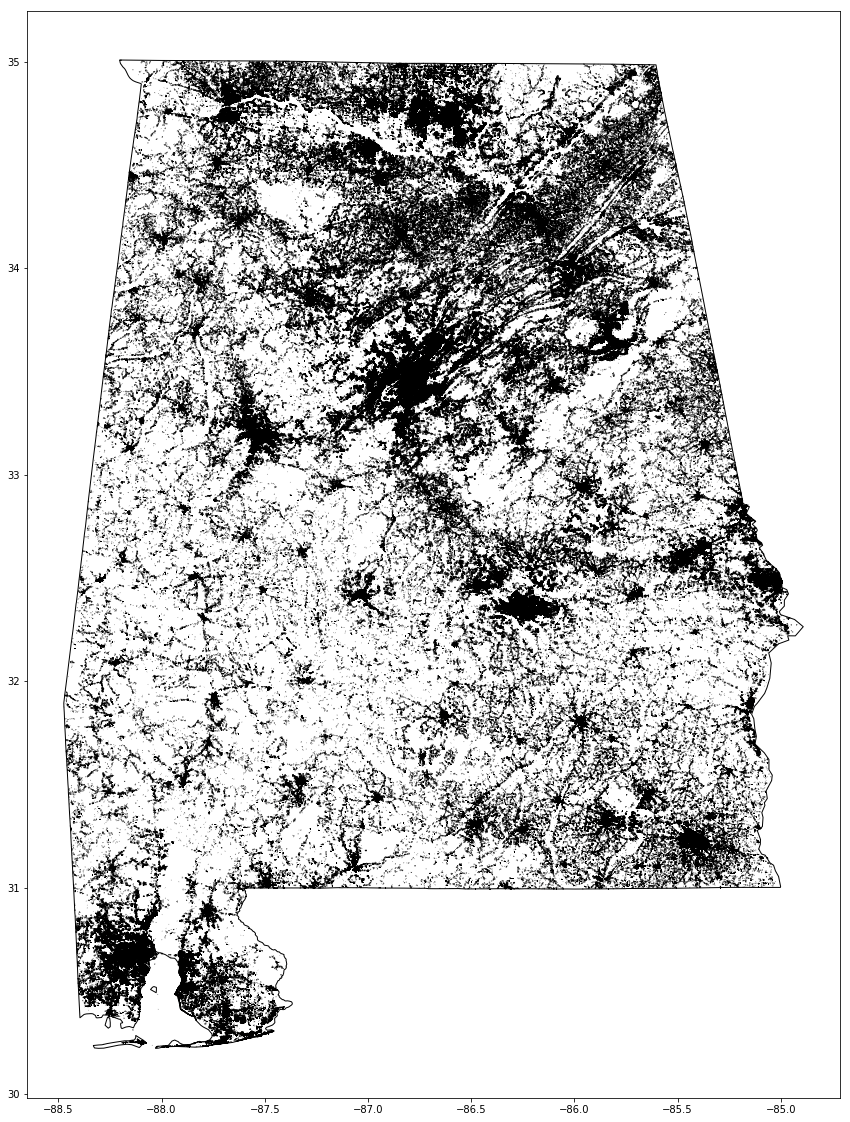

In [5]:
ax = states[states.STUSPS=='AL'].plot(color='white', edgecolor='black', figsize=(20,20))
df.plot(ax=ax, edgecolor='black', figsize=(20,20))

In [6]:
df.sindex

In [28]:
def score(name):
    
    city = WOFLocality.clean_us_cities().filter(WOFLocality.name==name, WOFLocality.name_a1=='Alabama').one()
    p = Point(city.longitude, city.latitude)
    pb = p.buffer(1)
    possible_idx = list(df.sindex.intersection(pb.bounds))
    possible = df.iloc[possible_idx]
    
    score = 0
    for b in tqdm(possible.itertuples(), total=len(possible_idx)):
        if b.geometry.centroid.within(pb):
            d = p.distance(b.geometry.centroid)
            score += stats.norm.pdf(d, 0, 0.1)

    return len(possible_idx), score

In [29]:
score('Tuscaloosa')

100%|██████████| 675964/675964 [02:00<00:00, 5606.31it/s]


(675964, 178397.85827347977)

In [30]:
score('Birmingham')

100%|██████████| 1030710/1030710 [03:06<00:00, 5515.44it/s]


(1030710, 465807.5115239752)

In [31]:
score('Arab')

100%|██████████| 1088523/1088523 [03:22<00:00, 5368.25it/s]


(1088523, 79199.63543440618)

In [32]:
score('Mobile')

100%|██████████| 333509/333509 [01:03<00:00, 5282.18it/s]


(333509, 271449.34282521385)